# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('/datasets/insurance.csv') 

In [3]:
df.info() #вывожу информацию о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Пропусков в таблице нет

In [4]:
df.head() # Просматриваю первые пять строк

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [5]:
df.describe() # вывожу информацию о датасете

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [6]:
df.duplicated().sum() # проверяю количество дубликатов

153

Поскольку дубликатов малое количество, наилучшим решением будет их удалить 

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df['Пол'].value_counts(normalize = True) # посмотрю на распределение полов 

0    0.501547
1    0.498453
Name: Пол, dtype: float64

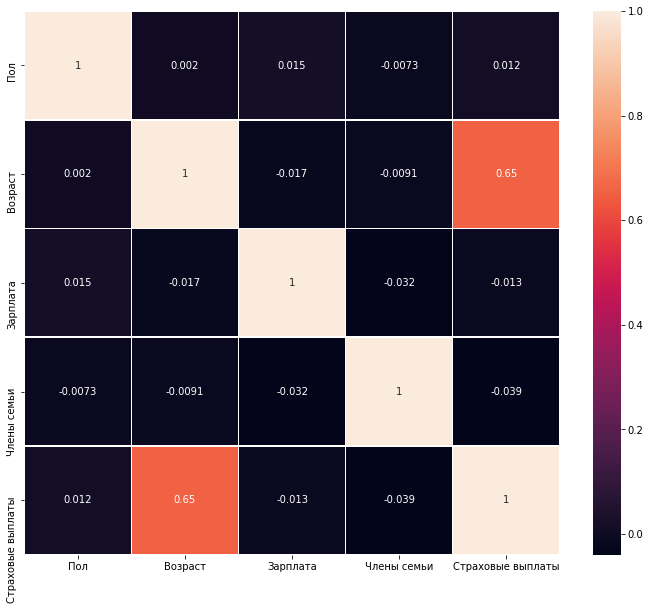

In [9]:
fig = plt.figure(figsize=(12, 10))
ax = sns.heatmap(df.corr(), linewidths=.5, annot = True)
plt.show();

**Вывод:**    
Аномалий в датасете не выявленно.    
Пол клиентов распределенем практически равномерно . Клиенты в возрасте от 18 до 65лет.     
C максимальной зарплатой 79000 и медианной в 40200. Есть конечно и значения с зарплатой в 5300.    
Максимальное количество членов семьи = 6     
Страховые выплаты положительно коррелируют с возрастом    

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

- $E$ — единичная матрица

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Качество линейной модели не поменяется. Из-за домножения признаков на обратимую матрицу, у нас поменяется вектор весов. Когда у нас предсказания останутся такими-же

**Обоснование:** 
Возьмём формулу обучения. 
$w = (X^T X)^{-1} X^T y$

мы домнажаем матрицу признаков $X$ на матрицу $P$ в следствии чего наше выражение принимает вид $X1 = X*P$

$w1 = ((XP)^T  (XP))^{-1} (XP)^T y$

Применяем свойство умножения матриц  $(AB)^T = B^T A^T$

$w1 = (P^T X^T X P)^{-1} P^T X^T y$

вытаскиваем квадратичные матрицы из под скобок

$w1 = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y$

обращаю внимание что $(P^T)^{-1} P^T = E $

$w1 =  P^{-1} (X^T  X)^{-1} E X^T y$

Вспоминая свойства единичной матрицы $EA = AE = A$

$w1 =   P^{-1} (X^T  X)^{-1} X^T y = P^{-1} w$


        
        
**Вывод:**  
Напоминаю формулу наших предсказаний $a1 = X1w1$. 
Где  $X1 = X P$, а формула обучения приняла вид $w1 = P^{-1} * w$


Подставляем всё это выходит $a1 = X P P^{-1}  w \Leftrightarrow a1 = X E w \Leftrightarrow a1 = Xw$. 
В следствии чего мы можем заявить, что $a1 = a$
Что и требовалось доказать. У нас получатся те же самые предсказания 

## Алгоритм преобразования

**Алгоритм**   
Нам надо создать обратимую квадратную матрицу, размером равным количеству признаков. 
Проверкой на обратимость будет являться высчитвание детерминантна матрицы. Если он не будет равен нулю, то матрица обратимая.

Далее мы умножаем матрицу признаков на созданную нами матрицу 

Обучаем модель линейной регресси на закодированной матрице и проверям качество обучения на метрике R2

Так же алгоритм должен возвращать декодер. 

И мы должны обучить модель на неизменненных данных и проверить качество обучения на метрике R2

На последнем этапе мы сравниваем метрики на зашифрованных данных и на не зашифрованных. Если качество обучения одинаковое, то наша теория подтвердилась 

**Обоснование**

В соответствии с нашими доказательствами должна получиться такая же оценка. Самое время проверить теорию на практике

## Проверка алгоритма

In [10]:
class LinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

Создаю функцию по перемножению матриц. 
Внутри функции сделал проверку на то получилось ли наша случайно сгенерированная матрица невырожденной. 
Ибо согласно теореме **Всякая невырожденная матрица имеет обратную**

In [11]:
def cryptography(features):
    x = np.random.normal(size = (features.shape[1], features.shape[1]))
    while np.linalg.det(x) == 0:
        x = np.random.normal(size = (features.shape[1], features.shape[1]))
    new_features = features @ x
    decoder =  np.linalg.inv(x)
    return new_features, decoder

In [12]:
features = df.drop('Страховые выплаты', axis = 1)  
target = df['Страховые выплаты']

In [13]:
features_cr, decoder = cryptography(features) #применяю функцию

Посмотрим на наши признаки 

In [14]:
display(features_cr.head())
features.head()

,0,1,2,3
0,-9197.024354,-25.253126,-58278.344818,-17655.336656
1,-7047.860477,-25.579943,-44657.891772,-13515.890561
2,-3895.067930,-16.018729,-24681.555105,-7467.063766
3,-7731.116347,-12.814233,-48989.271460,-14851.666029
4,-4840.076227,-17.422272,-30669.784700,-9286.441931


,Пол,Возраст,Зарплата,Члены семьи
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0


Так же проверим декодирование наших признаков 

In [15]:
np.round(pd.DataFrame(features_cr @ decoder)).head()

,0,1,2,3
0,1.0,41.0,49600.0,1.0
1,-0.0,46.0,38000.0,1.0
2,-0.0,29.0,21000.0,-0.0
3,-0.0,21.0,41700.0,2.0
4,1.0,28.0,26100.0,-0.0


Обучаю модель на не изменненых признаках

In [16]:
model = LinearRegression()
model.fit(features, target)
print(r2_score(target, model.predict(features)))

0.4302010044852068


Обучаю модель на признаках домножанных на матрицу

In [17]:
model = LinearRegression()
model.fit(features_cr, target)
print(r2_score(target, model.predict(features_cr)))

0.43020100448520215


**Вывод**    
Отличия в метриках начинаются на 10^-12. Можно сказать, что такие отличия незначительны и кодирование данных клиентов работает 

## Вывод

В исходных данных аномалий не было выявленно.  Были обнаруженны явные дубликаты. В ходе обработки было принято решение их удалить.     
Была построенна математическая теория зашифровывания личных данных клиентов.     
Алгоритм шифрования заключался в домнажении матрицы признаков на обратимую квадратную матрицу.     
В ходе практического опыта мы убедились в эффективности данного метода. Качество обучения не пострадало.    
Так же данный метод включает возможность дешифровки. Наша функция возвращает декодер
Для дешифровки надо умножить матрицу признаков на декодер. 